In [1]:
#import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
#read dataset from Zillow.com and create dataframe
metro_df = pd.read_csv('../Resources/County_Zhvi_AllHomes.csv',encoding='latin1')

# limit dataset to Atlanta Metro area
metro_df = metro_df[metro_df['Metro'] == 'Atlanta-Sandy Springs-Roswell']
metro_df.head()

,RegionID,RegionName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,2008-01,2008-02,2008-03,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
47,1020,Fulton County,GA,Atlanta-Sandy Springs-Roswell,13,121,48,248773.0,246335.5,244884.666667,...,300172.000000,301040.666667,301552.000000,303037.333333,302677.333333,303169.666667,302881.000000,303495.000000,303505.333333,303834.333333
64,2314,Gwinnett County,GA,Atlanta-Sandy Springs-Roswell,13,135,65,208649.0,208659.5,207854.666667,...,238193.000000,239423.666667,241081.000000,242118.333333,242256.666667,242769.666667,243430.666667,244337.333333,245080.000000,246419.333333
84,984,Dekalb County,GA,Atlanta-Sandy Springs-Roswell,13,89,85,195378.0,193607.0,191968.000000,...,226872.333333,228252.666667,229497.333333,229468.666667,229538.333333,229395.666667,229963.000000,230349.333333,230941.000000,232076.000000
85,135,Cobb County,GA,Atlanta-Sandy Springs-Roswell,13,67,86,203638.0,202724.5,202229.333333,...,263566.000000,264762.333333,265578.333333,267731.000000,268035.666667,268214.000000,268984.666667,271067.666667,272449.333333,272919.666667
248,1622,Clayton County,GA,Atlanta-Sandy Springs-Roswell,13,63,249,NaN,NaN,NaN,...,131447.666667,132563.333333,132498.333333,132890.666667,133286.666667,133683.000000,134317.000000,135528.666667,136795.666667,137568.000000


In [3]:
# create new dataframe with Metro Counties of interest
county_df = pd.DataFrame({'RegionName':['Fulton County', 'Douglas County', 'Cobb County', 'Cherokee County', 'Forsyth County', 'Gwinnett County', \
                                        'Dekalb County', 'Clayton County', 'Fayette County', 'Coweta County']})
county_df

,RegionName
0,Fulton County
1,Douglas County
2,Cobb County
3,Cherokee County
4,Forsyth County
5,Gwinnett County
6,Dekalb County
7,Clayton County
8,Fayette County
9,Coweta County


In [4]:
# Populate zillow data for counties of interest by using left merge
county_df = pd.merge(county_df, metro_df, on="RegionName", how="left")
county_df

,RegionName,RegionID,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,2008-01,2008-02,2008-03,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,Fulton County,1020,GA,Atlanta-Sandy Springs-Roswell,13,121,48,248773.0,246335.5,244884.666667,...,300172.000000,301040.666667,301552.000000,303037.333333,302677.333333,303169.666667,302881.000000,303495.000000,303505.333333,303834.333333
1,Douglas County,1671,GA,Atlanta-Sandy Springs-Roswell,13,97,454,NaN,NaN,NaN,...,173282.666667,173258.666667,174072.333333,175006.000000,176262.333333,177520.666667,178789.666667,179942.333333,181433.333333,181996.000000
2,Cobb County,135,GA,Atlanta-Sandy Springs-Roswell,13,67,86,203638.0,202724.5,202229.333333,...,263566.000000,264762.333333,265578.333333,267731.000000,268035.666667,268214.000000,268984.666667,271067.666667,272449.333333,272919.666667
3,Cherokee County,2188,GA,Atlanta-Sandy Springs-Roswell,13,57,286,234977.0,234408.0,233890.333333,...,275139.333333,277086.333333,278577.000000,279346.666667,279940.000000,280949.333333,281786.000000,282237.000000,282975.000000,283573.333333
4,Forsyth County,1711,GA,Atlanta-Sandy Springs-Roswell,13,117,345,298261.0,297928.5,297543.333333,...,348796.666667,349901.333333,350175.333333,348509.333333,348398.000000,348966.333333,350666.000000,351645.000000,352312.666667,352785.333333
5,Gwinnett County,2314,GA,Atlanta-Sandy Springs-Roswell,13,135,65,208649.0,208659.5,207854.666667,...,238193.000000,239423.666667,241081.000000,242118.333333,242256.666667,242769.666667,243430.666667,244337.333333,245080.000000,246419.333333
6,Dekalb County,984,GA,Atlanta-Sandy Springs-Roswell,13,89,85,195378.0,193607.0,191968.000000,...,226872.333333,228252.666667,229497.333333,229468.666667,229538.333333,229395.666667,229963.000000,230349.333333,230941.000000,232076.000000
7,Clayton County,1622,GA,Atlanta-Sandy Springs-Roswell,13,63,249,NaN,NaN,NaN,...,131447.666667,132563.333333,132498.333333,132890.666667,133286.666667,133683.000000,134317.000000,135528.666667,136795.666667,137568.000000
8,Fayette County,1697,GA,Atlanta-Sandy Springs-Roswell,13,113,538,264963.0,264313.5,265133.000000,...,300241.333333,300559.333333,301790.333333,301211.000000,301157.000000,300526.666667,300658.666667,301878.000000,303144.666667,304371.333333
9,Coweta County,960,GA,Atlanta-Sandy Springs-Roswell,13,77,470,192672.0,192458.5,192201.333333,...,220983.666667,221891.333333,222697.666667,223292.666667,224400.666667,225619.666667,227169.666667,228350.666667,229125.333333,229478.000000


In [5]:
# drop columns not relevant
county_df = county_df.drop(columns={'State','RegionID','StateCodeFIPS', 'MunicipalCodeFIPS', 'SizeRank','Metro'})

In [6]:
# drop all 2008 - 2014 columns - regex uses pattern to filter.  The analysis is for years 2015 to 2019.
county_df = county_df[county_df.columns.drop(list(county_df.filter(regex='2008')))]
county_df = county_df[county_df.columns.drop(list(county_df.filter(regex='2009')))]
county_df = county_df[county_df.columns.drop(list(county_df.filter(regex='2010')))]
county_df = county_df[county_df.columns.drop(list(county_df.filter(regex='2011')))]
county_df = county_df[county_df.columns.drop(list(county_df.filter(regex='2012')))]
county_df = county_df[county_df.columns.drop(list(county_df.filter(regex='2013')))]
county_df = county_df[county_df.columns.drop(list(county_df.filter(regex='2014')))]
county_df.head()

,RegionName,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,Fulton County,219747.000000,221081.000000,223096.666667,225309.333333,228063.333333,230246.333333,231355.666667,231659.666667,231946.666667,...,300172.000000,301040.666667,301552.000000,303037.333333,302677.333333,303169.666667,302881.000000,303495.000000,303505.333333,303834.333333
1,Douglas County,128349.666667,129808.333333,131236.666667,131839.333333,132361.000000,132226.333333,132021.666667,132179.666667,132528.000000,...,173282.666667,173258.666667,174072.333333,175006.000000,176262.333333,177520.666667,178789.666667,179942.333333,181433.333333,181996.000000
2,Cobb County,206167.333333,206185.000000,205970.000000,206633.000000,208443.333333,210456.666667,210872.000000,211580.000000,212423.333333,...,263566.000000,264762.333333,265578.333333,267731.000000,268035.666667,268214.000000,268984.666667,271067.666667,272449.333333,272919.666667
3,Cherokee County,208694.666667,208723.666667,208711.666667,209671.000000,211435.333333,213070.000000,214718.666667,215891.666667,216805.333333,...,275139.333333,277086.333333,278577.000000,279346.666667,279940.000000,280949.333333,281786.000000,282237.000000,282975.000000,283573.333333
4,Forsyth County,292784.333333,295340.000000,297015.000000,297841.666667,298821.000000,300026.666667,301016.666667,301566.333333,302507.000000,...,348796.666667,349901.333333,350175.333333,348509.333333,348398.000000,348966.333333,350666.000000,351645.000000,352312.666667,352785.333333


In [7]:
# Transpose dataset for better manipulation
county_pivot = county_df.transpose().reset_index()
county_pivot.head()

,index,0,1,2,3,4,5,6,7,8,9
0,RegionName,Fulton County,Douglas County,Cobb County,Cherokee County,Forsyth County,Gwinnett County,Dekalb County,Clayton County,Fayette County,Coweta County
1,2015-01,219747,128350,206167,208695,292784,180413,166417,88497,239832,179607
2,2015-02,221081,129808,206185,208724,295340,181436,167051,88817.7,241570,180890
3,2015-03,223097,131237,205970,208712,297015,182233,167105,89094,242084,181074
4,2015-04,225309,131839,206633,209671,297842,182769,167463,89601.3,242243,181515


In [8]:
# Notice output of previous step. The first row needs to be header.
county_pivot.columns = county_pivot.iloc[0]

# update header of Year-Month column
county_pivot = county_pivot.rename(columns={"RegionName":"Period"})
county_pivot.head()


,Period,Fulton County,Douglas County,Cobb County,Cherokee County,Forsyth County,Gwinnett County,Dekalb County,Clayton County,Fayette County,Coweta County
0,RegionName,Fulton County,Douglas County,Cobb County,Cherokee County,Forsyth County,Gwinnett County,Dekalb County,Clayton County,Fayette County,Coweta County
1,2015-01,219747,128350,206167,208695,292784,180413,166417,88497,239832,179607
2,2015-02,221081,129808,206185,208724,295340,181436,167051,88817.7,241570,180890
3,2015-03,223097,131237,205970,208712,297015,182233,167105,89094,242084,181074
4,2015-04,225309,131839,206633,209671,297842,182769,167463,89601.3,242243,181515


In [9]:
# drop the first row since that has now become the column names.
county_pivot = county_pivot.drop(0)
county_pivot.head()

,Period,Fulton County,Douglas County,Cobb County,Cherokee County,Forsyth County,Gwinnett County,Dekalb County,Clayton County,Fayette County,Coweta County
1,2015-01,219747,128350,206167,208695,292784,180413,166417,88497,239832,179607
2,2015-02,221081,129808,206185,208724,295340,181436,167051,88817.7,241570,180890
3,2015-03,223097,131237,205970,208712,297015,182233,167105,89094,242084,181074
4,2015-04,225309,131839,206633,209671,297842,182769,167463,89601.3,242243,181515
5,2015-05,228063,132361,208443,211435,298821,183427,168649,89825,242313,181047


In [10]:
# add Year column to calculate mean by year
county_pivot['Year'] = county_pivot['Period'].str[0:4]
county_pivot.head()

,Period,Fulton County,Douglas County,Cobb County,Cherokee County,Forsyth County,Gwinnett County,Dekalb County,Clayton County,Fayette County,Coweta County,Year
1,2015-01,219747,128350,206167,208695,292784,180413,166417,88497,239832,179607,2015
2,2015-02,221081,129808,206185,208724,295340,181436,167051,88817.7,241570,180890,2015
3,2015-03,223097,131237,205970,208712,297015,182233,167105,89094,242084,181074,2015
4,2015-04,225309,131839,206633,209671,297842,182769,167463,89601.3,242243,181515,2015
5,2015-05,228063,132361,208443,211435,298821,183427,168649,89825,242313,181047,2015


In [11]:
# rearrange columns for better readability
county_pivot = county_pivot[['Year','Period','Fulton County', 'Douglas County', 'Cobb County', 'Cherokee County', 'Forsyth County', 'Gwinnett County', \
                                        'Dekalb County', 'Clayton County', 'Fayette County', 'Coweta County']]
county_pivot.head()

,Year,Period,Fulton County,Douglas County,Cobb County,Cherokee County,Forsyth County,Gwinnett County,Dekalb County,Clayton County,Fayette County,Coweta County
1,2015,2015-01,219747,128350,206167,208695,292784,180413,166417,88497,239832,179607
2,2015,2015-02,221081,129808,206185,208724,295340,181436,167051,88817.7,241570,180890
3,2015,2015-03,223097,131237,205970,208712,297015,182233,167105,89094,242084,181074
4,2015,2015-04,225309,131839,206633,209671,297842,182769,167463,89601.3,242243,181515
5,2015,2015-05,228063,132361,208443,211435,298821,183427,168649,89825,242313,181047


In [12]:
# transpose converted the float data into Object.  Convert them back to numeric
county_pivot['Fulton County'] = pd.to_numeric(county_pivot['Fulton County'])
county_pivot['Douglas County'] = pd.to_numeric(county_pivot['Douglas County'])
county_pivot['Cobb County'] = pd.to_numeric(county_pivot['Cobb County'])
county_pivot['Cherokee County'] = pd.to_numeric(county_pivot['Cherokee County'])
county_pivot['Forsyth County'] = pd.to_numeric(county_pivot['Forsyth County'])
county_pivot['Gwinnett County'] = pd.to_numeric(county_pivot['Gwinnett County'])
county_pivot['Dekalb County'] = pd.to_numeric(county_pivot['Dekalb County'])
county_pivot['Clayton County'] = pd.to_numeric(county_pivot['Clayton County'])
county_pivot['Fayette County'] = pd.to_numeric(county_pivot['Fayette County'])
county_pivot['Coweta County'] = pd.to_numeric(county_pivot['Coweta County'])


#calculate average house prices by year for each county
county_avg_df = county_pivot.groupby(['Year']).mean()
county_avg_df.head()

,Fulton County,Douglas County,Cobb County,Cherokee County,Forsyth County,Gwinnett County,Dekalb County,Clayton County,Fayette County,Coweta County
Year,,,,,,,,,,
2015,228872.361111,132062.055556,210319.333333,213970.972222,300092.250000,185308.555556,171543.638889,91078.222222,244243.166667,182143.805556
2016,245552.472222,139644.305556,224056.194444,232807.750000,311770.555556,196713.277778,187074.277778,99914.138889,257533.277778,191609.027778
2017,265888.333333,152154.055556,238811.527778,243768.333333,325357.555556,210888.611111,195976.583333,110590.500000,276493.111111,200227.305556
2018,289372.500000,165849.361111,256166.638889,263247.583333,342385.555556,228837.777778,217172.527778,121118.888889,290621.138889,213705.222222
2019,302269.363636,176777.969697,267940.545455,279526.484848,349952.030303,242018.272727,229216.848485,133648.606061,301312.090909,224846.757576


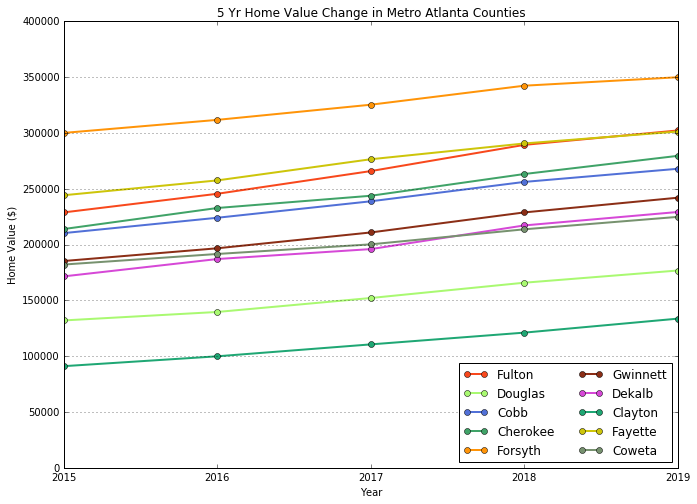

In [13]:
# Generate the Plot
# Setting up the plot and its size

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(11,8)

bottom, top = plt.ylim()
plt.ylim(top=400000)


# colors from https://xkcd.com/color/rgb/
Fulton, = plt.plot(county_avg_df.index, county_avg_df['Fulton County'], marker='o', color="#f8481c", linewidth=2, label="Fulton") # reddish orange
Douglas, = plt.plot(county_avg_df.index, county_avg_df['Douglas County'], marker='o', color="#a9f971", linewidth=2, label="Douglas") # spring green
Cobb, = plt.plot(county_avg_df.index, county_avg_df['Cobb County'], marker='o', color="#5170d7", linewidth=2, label="Cobb") # cornflower blue
Cherokee, = plt.plot(county_avg_df.index, county_avg_df['Cherokee County'], marker='o', color="#40a368", linewidth=2, label="Cherokee") # greenish
Forsyth, = plt.plot(county_avg_df.index, county_avg_df['Forsyth County'], marker='o', color="#ff9408", linewidth=2, label="Forsyth") # tangerine
Gwinnett, = plt.plot(county_avg_df.index, county_avg_df['Gwinnett County'], marker='o', color="#8b2e16", linewidth=2, label="Gwinnett") # red brown
Dekalb, = plt.plot(county_avg_df.index, county_avg_df['Dekalb County'], marker='o', color="#d648d7", linewidth=2, label="Dekalb") # pinkish purple
Clayton, = plt.plot(county_avg_df.index, county_avg_df['Clayton County'], marker='o', color="#1fa774", linewidth=2, label="Clayton") # jade
Fayette, = plt.plot(county_avg_df.index, county_avg_df['Fayette County'], marker='o', color="#cdc50a", linewidth=2, label="Fayette")# dirty yellow
Coweta, = plt.plot(county_avg_df.index, county_avg_df['Coweta County'], marker='o', color="#77926f", linewidth=2, label="Coweta") # green grey

# Add labels to the x and y axes
plt.title("5 Yr Home Value Change in Metro Atlanta Counties")
plt.xlabel("Year")
plt.ylabel("Home Value ($)")
plt.grid(axis='y')

# Create a legend for the chart
plt.legend(handles=[Fulton, Douglas, Cobb, Cherokee, Forsyth, Gwinnett, Dekalb, Clayton, Fayette, Coweta],  loc="best", ncol=2)

# Save the Figure
plt.savefig("../Images/CountyYearlyChange.png")

# Show the Figure
plt.show()

In [14]:
# Calculate Home Value growth by Counties

pct_fulton = round(((county_avg_df['Fulton County'].iloc[-1] / county_avg_df['Fulton County'].iloc[0] - 1) * 100), 1)
pct_douglas = round(((county_avg_df['Douglas County'].iloc[-1] / county_avg_df['Douglas County'].iloc[0] - 1) * 100), 1)
pct_cobb = round(((county_avg_df['Cobb County'].iloc[-1] / county_avg_df['Cobb County'].iloc[0] - 1) * 100), 1)
pct_forsyth = round(((county_avg_df['Forsyth County'].iloc[-1] / county_avg_df['Forsyth County'].iloc[0] - 1) * 100), 1)
pct_cherokee = round(((county_avg_df['Cherokee County'].iloc[-1] / county_avg_df['Cherokee County'].iloc[0] - 1) * 100), 1)
pct_gwinnett = round(((county_avg_df['Gwinnett County'].iloc[-1] / county_avg_df['Gwinnett County'].iloc[0] - 1) * 100), 1)
pct_dekalb = round(((county_avg_df['Dekalb County'].iloc[-1] / county_avg_df['Dekalb County'].iloc[0] - 1) * 100), 1)
pct_clayton = round(((county_avg_df['Clayton County'].iloc[-1] / county_avg_df['Clayton County'].iloc[0] - 1) * 100), 1)
pct_fayette = round(((county_avg_df['Fayette County'].iloc[-1] / county_avg_df['Fayette County'].iloc[0] - 1) * 100), 1)
pct_coweta = round(((county_avg_df['Coweta County'].iloc[-1] / county_avg_df['Coweta County'].iloc[0] - 1) * 100), 1)

pct_change_y = [pct_fulton, pct_douglas, pct_cobb, pct_forsyth, pct_cherokee, pct_gwinnett, pct_dekalb, pct_clayton, pct_fayette, pct_coweta]
pct_change_x = ['Fulton', 'Douglas', 'Cobb', 'Cherokee', 'Forsyth', 'Gwinnett', 'Dekalb', 'Clayton', 'Fayette', 'Coweta']

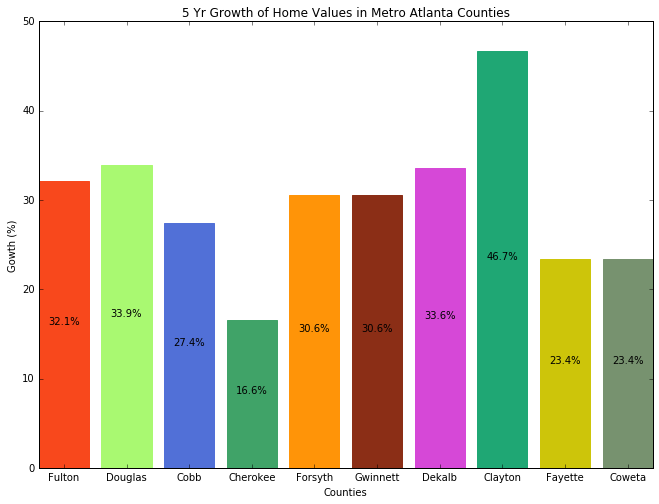

In [15]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(11,8)

change_plt = plt.bar(pct_change_x, pct_change_y)

# set plot color
change_plt[0].set_color('#f8481c')
change_plt[1].set_color('#a9f971')
change_plt[2].set_color('#5170d7')
change_plt[3].set_color('#40a368')
change_plt[4].set_color('#ff9408')
change_plt[5].set_color('#8b2e16')
change_plt[6].set_color('#d648d7')
change_plt[7].set_color('#1fa774')
change_plt[8].set_color('#cdc50a')
change_plt[9].set_color('#77926f')

# Add labels to the x and y axes
plt.title("5 Yr Growth of Home Values in Metro Atlanta Counties")
plt.xlabel("Counties")
plt.ylabel("Gowth (%)")

# Use functions to label the percentages of changes
# Reference: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(bars):
    for i in bars:
        height = i.get_height()
        if height > 0:
            label_position = i.get_height()/2. # bottom left of text position
        else:
            label_position = -10 # bottom left of text position
            
        plt.text(i.get_x() + i.get_width()/2., label_position,
                str(height)+ '%' ,color='black', ha='center')

# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig("../Images/CountyHomeValueGrowth.png")